# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Islam Cahya Wicaksana
- Email: wicakislamcahya@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from joblib import dump, load

### Menyiapkan data yang akan digunakan

##### Membaca data dari file CSV

In [63]:
df = pd.read_csv('data.csv', delimiter=';')

##### Setting agar bisa show semua data

In [64]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Understanding

##### Menampilkan 5 beberapa baris pertama dari dataset

In [65]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


##### Melihat informasi umum dari dataset

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

##### Mengecek distribusi nilai pada setiap fitur

In [67]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


##### Mengecek distribusi nilai pada label Status

In [68]:
df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

##### Visualisasi distribusi fitur utama

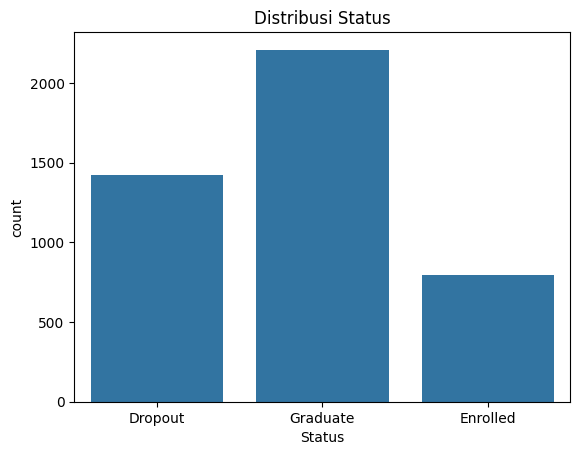

In [69]:
sns.countplot(x='Status', data=df)
plt.title('Distribusi Status')
plt.show()

##### Terdapat imbalance data untuk tiap label, sehingga nanti perlu untuk diatasi

##### Membuat Correlation matrix untuk mencari insight baru hubungan antar fitur

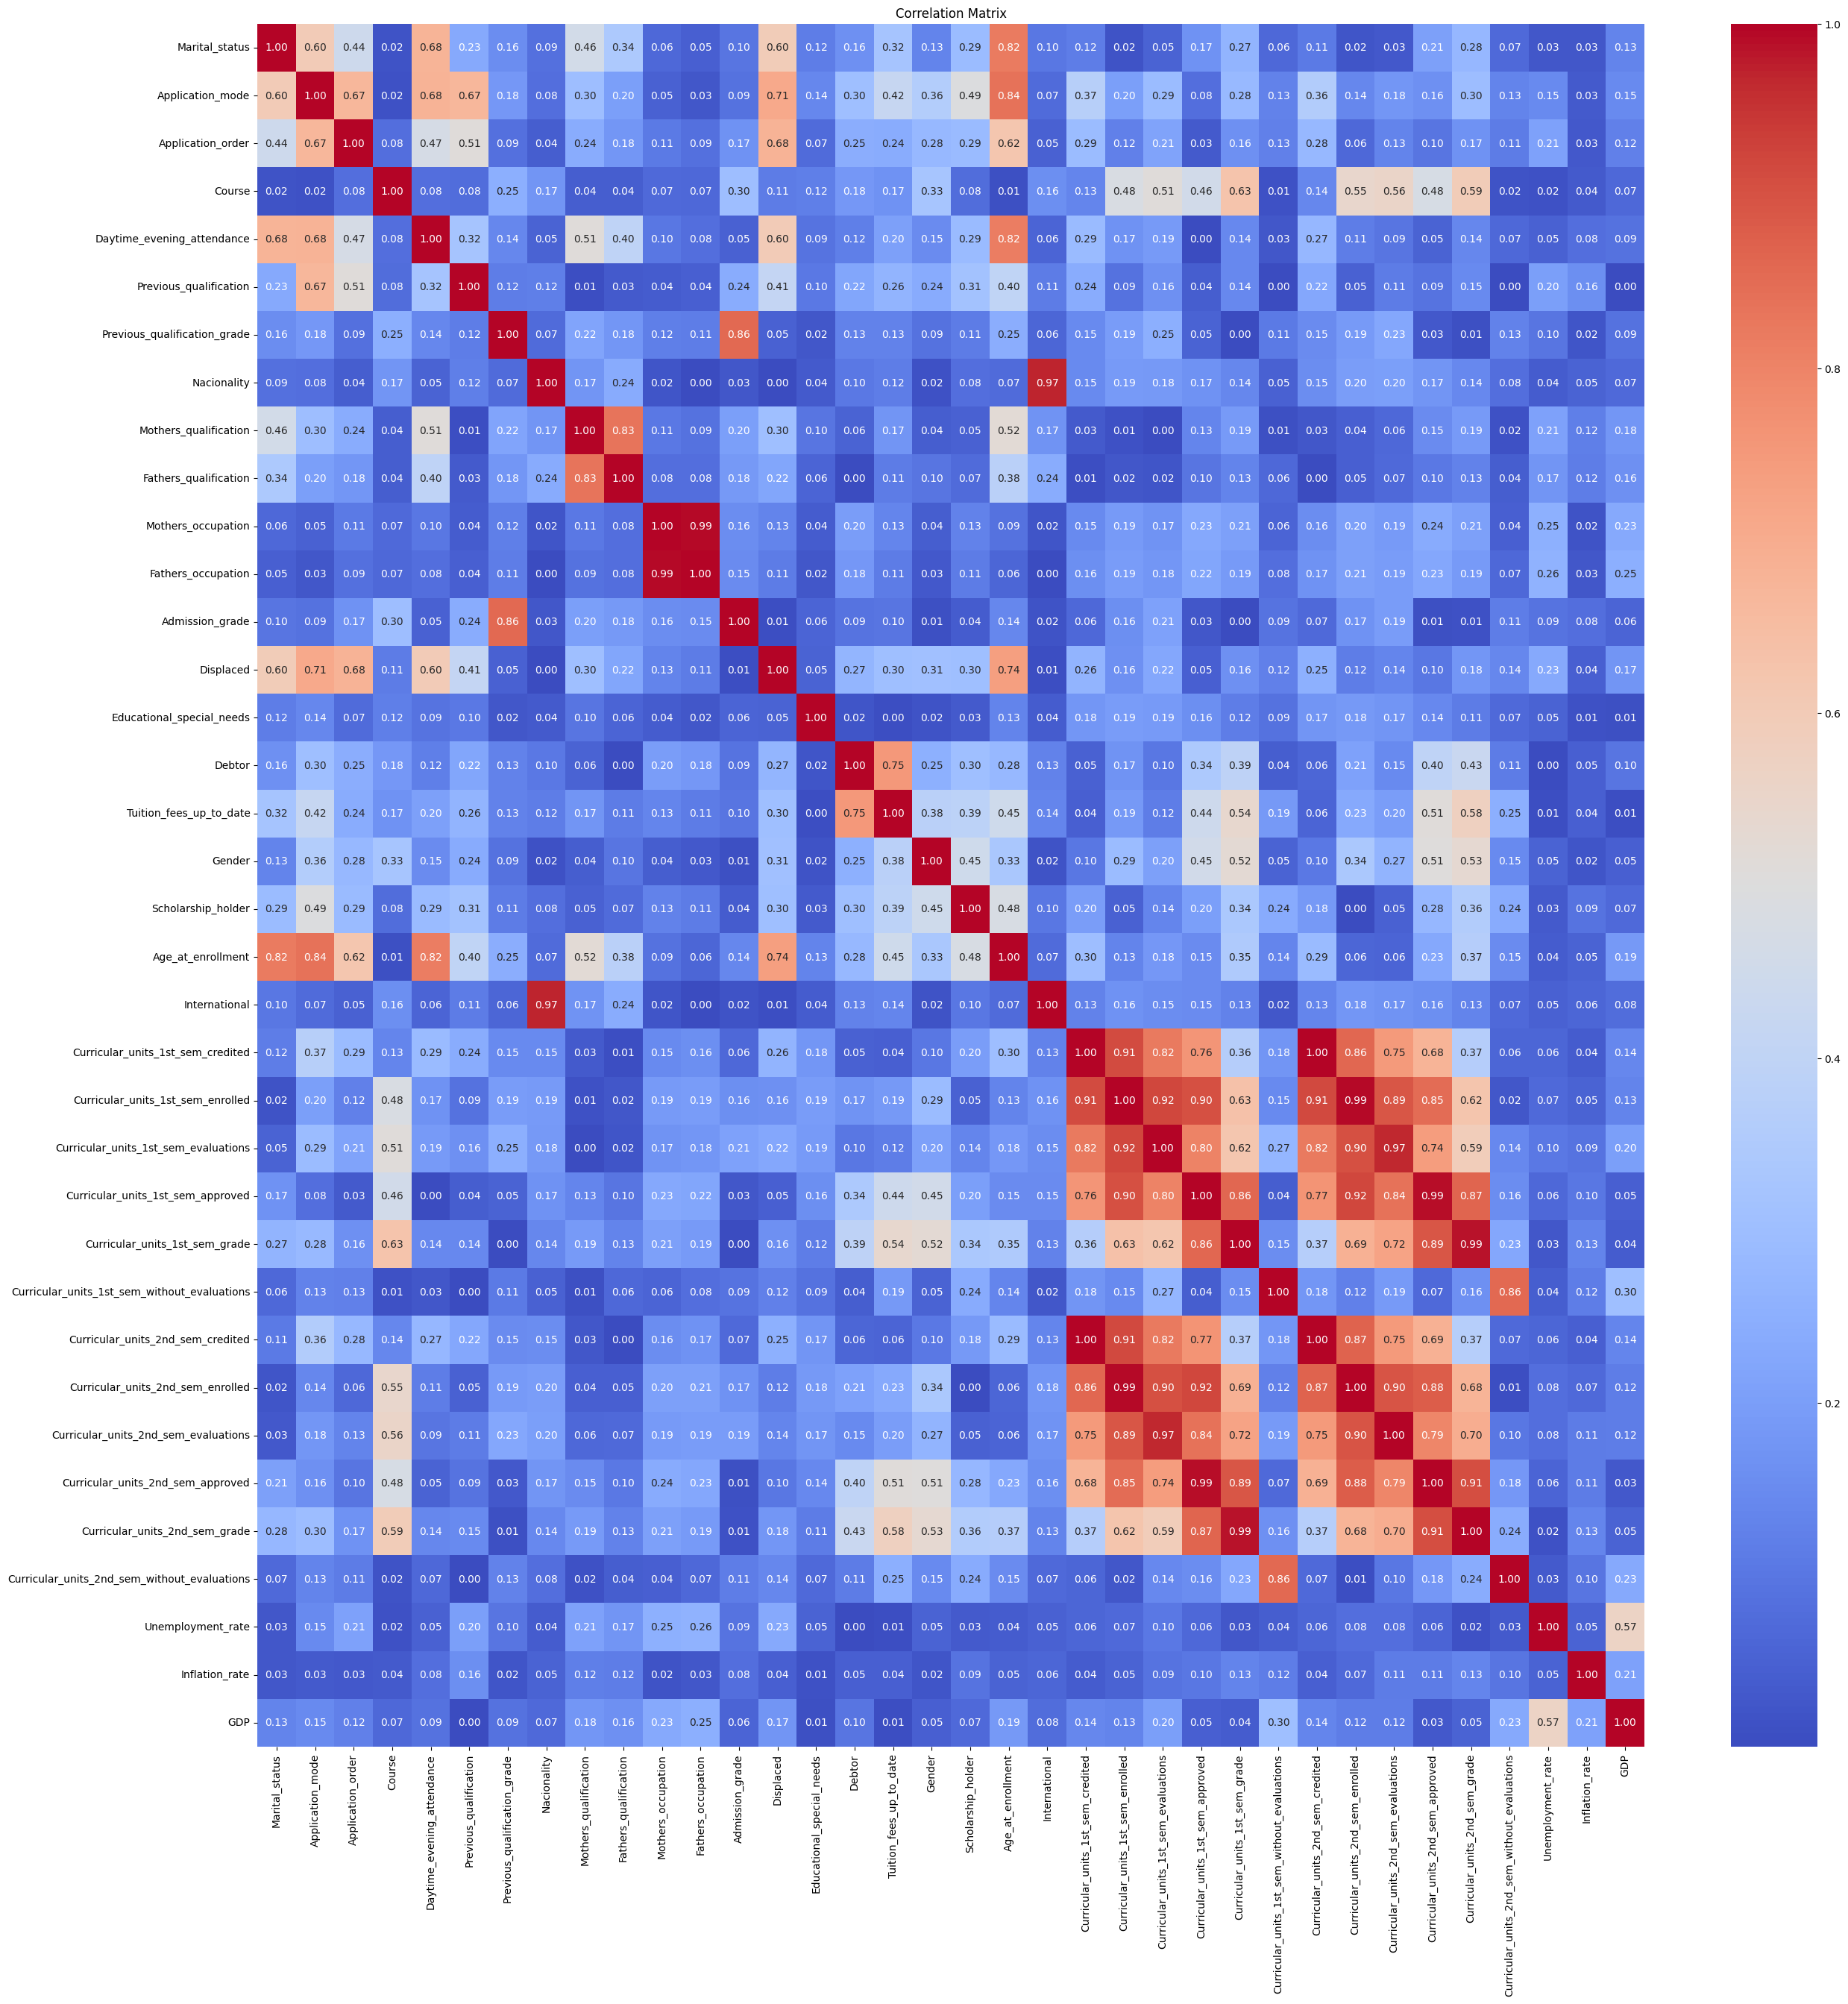

In [70]:
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(30, 30))
correlation_matrix = correlation_matrix.corr().abs()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Dari Correlation Matrix diatas, saya mendapatkan beberapa korelasi antar fitur
1. Curricular_units_2nd_sem_enrolled dan Curricular_units_2nd_sem_evaluations:
Korelasi positif yang sangat kuat (sekitar 0.96), menunjukkan bahwa semakin banyak kursus yang diambil pada semester kedua, semakin banyak evaluasi yang dilakukan.

2. Curricular_units_1st_sem_enrolled dan Curricular_units_1st_sem_evaluations:
Korelasi positif yang sangat kuat (sekitar 0.95), menunjukkan bahwa semakin banyak kursus yang diambil pada semester pertama, semakin banyak evaluasi yang dilakukan.

3. Curricular_units_2nd_sem_approved dan Curricular_units_2nd_sem_enrolled:
Korelasi positif yang kuat (sekitar 0.75), menunjukkan bahwa semakin banyak kursus yang diambil pada semester kedua, semakin banyak kursus yang disetujui.

4. Curricular_units_1st_sem_approved dan Curricular_units_1st_sem_enrolled:
Korelasi positif yang kuat (sekitar 0.74), menunjukkan bahwa semakin banyak kursus yang diambil pada semester pertama, semakin banyak kursus yang disetujui.

5. Previous_qualification_grade dan Admission_grade:
Korelasi positif yang moderat (sekitar 0.69), menunjukkan bahwa semakin tinggi nilai kualifikasi sebelumnya, semakin tinggi nilai penerimaan.

## Data Preparation / Preprocessing

##### Hapus row yang memiliki value Enrolled pada Kolom Status nya

In [71]:
# Menghapus baris dengan status 'Enrolled'
df = df[df['Status'] != 'Enrolled']

##### Memilih fitur yang berkorelasi untuk training

In [72]:
selected_features = [
    'Curricular_units_2nd_sem_enrolled', 
    'Curricular_units_2nd_sem_evaluations', 
    'Curricular_units_1st_sem_enrolled', 
    'Curricular_units_1st_sem_evaluations', 
    'Previous_qualification_grade', 
    'Admission_grade'
]


##### Memisahkan fitur dan target variable

In [73]:
X = df[selected_features]
y = df['Status']

##### Ubah label menjadi numerik

In [74]:
# Mengubah label menjadi numerik
y = y.map({'Dropout': 0, 'Graduate': 1})

In [75]:
print(y.isnull().sum())
print(df.isnull().any().any())

0
False


##### Membagi data menjadi training dan testing set

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Visualisasi Imbalance Data Sebelum SMOTE

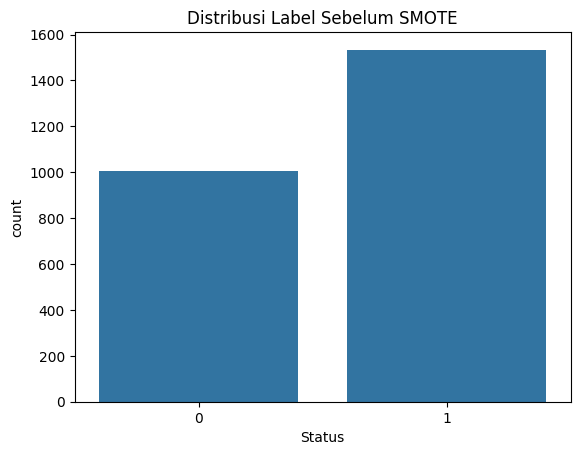

In [77]:
sns.countplot(x=y_train)
plt.title('Distribusi Label Sebelum SMOTE')
plt.show()

##### Mengatasi Imbalance dengan SMOTE

In [78]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

##### Visualisasi Imbalance Data Setelah SMOTE

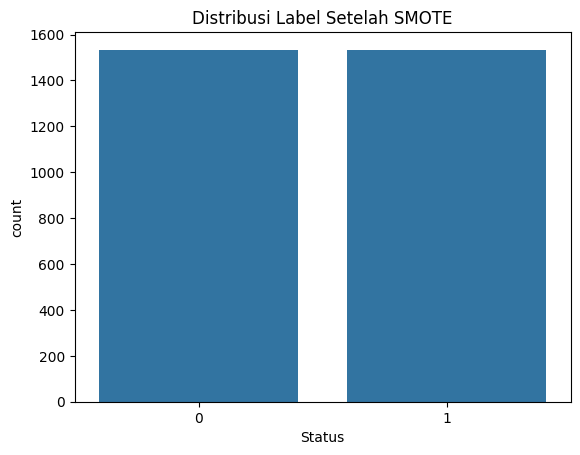

In [79]:
sns.countplot(x=y_train)
plt.title('Distribusi Label Setelah SMOTE')
plt.show()

##### Standarisasi fitur

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Mengaplikasikan PCA (Principal Component Analysis) untuk mengurangi dimensi data

In [81]:
# Mengaplikasikan PCA
pca = PCA(n_components=0.95)  # Menjaga 95% dari variabilitas data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Modeling

##### List 3 Model

In [82]:
# Modeling dengan beberapa algoritma
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

##### Modeling dengan Logistic Regression

In [83]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_pca, y_train)
y_pred_logreg = logreg.predict(X_test_pca)

##### Modeling dengan Decision Tree

In [84]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_pca, y_train)
y_pred_dtree = dtree.predict(X_test_pca)

##### Modeling dengan Random Forest


In [85]:
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train_pca, y_train)
y_pred_rforest = rforest.predict(X_test_pca)

## Evaluation

##### Evaluasi Model Logistik Regresi

In [86]:
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)
logreg_class_report = classification_report(y_test, y_pred_logreg)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

print("Model : Logistic Regression")
print("Classification Report")
print(logreg_class_report)
print("Accuracy")
print(logreg_accuracy)

Model : Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.49      0.62      0.55       414
           1       0.72      0.61      0.66       675

    accuracy                           0.61      1089
   macro avg       0.61      0.62      0.61      1089
weighted avg       0.64      0.61      0.62      1089

Accuracy
0.6143250688705234


##### Evaluasi Model Decision Tree

In [87]:
dtree_conf_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_class_report = classification_report(y_test, y_pred_dtree)
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)

print("Model : Decision Tree")
print("Classification Report")
print(dtree_class_report)
print("Accuracy")
print(dtree_accuracy)

Model : Decision Tree
Classification Report
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       414
           1       0.74      0.70      0.72       675

    accuracy                           0.66      1089
   macro avg       0.65      0.65      0.65      1089
weighted avg       0.67      0.66      0.67      1089

Accuracy
0.6648301193755739


##### Evaluasi Model Random Forest

In [88]:
rforest_conf_matrix = confusion_matrix(y_test, y_pred_rforest)
rforest_class_report = classification_report(y_test, y_pred_rforest)
rforest_accuracy = accuracy_score(y_test, y_pred_rforest)
print("Model : Random Forest")
print("Classification Report")
print(rforest_class_report)
print("Accuracy")
print(rforest_accuracy)

Model : Random Forest
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       414
           1       0.78      0.80      0.79       675

    accuracy                           0.74      1089
   macro avg       0.72      0.72      0.72      1089
weighted avg       0.73      0.74      0.73      1089

Accuracy
0.7355371900826446


##### Karena Model Random Forest memiliki Akurasi yang paling bagus sebesar 73%. Maka save model Random Forest

In [89]:
# Menyimpan model Random Forest dan scaler
dump(rforest, 'model_randomforest.joblib')
dump(scaler, 'scaler.joblib')
dump(pca, 'pca.joblib')

['pca.joblib']